# K Means Clustering 

K Means is a unsupervised learning method used when you have unlabeled data. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

    1. The centroids of the K clusters, which can be used to label new data
    2. Labels for the training data (each data point is assigned to a single cluster)
    
The overal goal is to divide data into distinct groups with similar observation at each group 

### Steps:
    1. choose the K clusters (One of the metrics that is commonly used to compare results across different values of K is the   mean distance between data points and their cluster centroid. mean distance to the centroid as a function of K is plotted and the "elbow point," where the rate of decrease sharply shifts, can be used to roughly determine K.)
    2.Assign each point to a cluster 
    3.until clusters stop changing, repeat the following :
        For each cluster compute the cluster centroid (mean vector of the the points in a cluster)
        Assign each data again to the nearest centroid

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 

## Using Sklearn to create some artificial data for clustering 



In [2]:
from sklearn.datasets import make_blobs

In [29]:
data = make_blobs(n_samples=300, n_features=2, centers=4 , cluster_std=1.5, random_state=101)

In [30]:
data 

(array([[ -1.95560149,   5.81161715],
        [  2.84590013,   6.17551268],
        [  0.12571147,   1.9991435 ],
        [ -2.32221922,   7.20870118],
        [ -2.06813772,   6.7997234 ],
        [-10.30108995,  -4.75602595],
        [ -0.25876239,   2.95579148],
        [ -1.37699434,   1.41390146],
        [  0.60865934,   0.31408402],
        [  3.11736994,   6.30654348],
        [  0.87982655,   4.70672399],
        [  0.78197073,   3.95393613],
        [  0.84328133,   1.70776471],
        [ -1.8515772 ,   7.3371375 ],
        [-12.50935985,  -6.81953605],
        [  5.7332502 ,   7.06371157],
        [ -8.22732142,  -9.07087205],
        [ -4.28132481,   9.39406119],
        [  1.34427522,   1.45250996],
        [ -2.6309351 ,   0.11302418],
        [ -8.07627668,  -7.37643061],
        [ -8.09696914,  -9.32845817],
        [-10.71280532,  -4.16534357],
        [ -4.89869058,   8.80722007],
        [ -2.18945293,   1.91431139],
        [ -4.35888285,   9.5517345 ],
        [  2

In [31]:
data[0]

array([[ -1.95560149,   5.81161715],
       [  2.84590013,   6.17551268],
       [  0.12571147,   1.9991435 ],
       [ -2.32221922,   7.20870118],
       [ -2.06813772,   6.7997234 ],
       [-10.30108995,  -4.75602595],
       [ -0.25876239,   2.95579148],
       [ -1.37699434,   1.41390146],
       [  0.60865934,   0.31408402],
       [  3.11736994,   6.30654348],
       [  0.87982655,   4.70672399],
       [  0.78197073,   3.95393613],
       [  0.84328133,   1.70776471],
       [ -1.8515772 ,   7.3371375 ],
       [-12.50935985,  -6.81953605],
       [  5.7332502 ,   7.06371157],
       [ -8.22732142,  -9.07087205],
       [ -4.28132481,   9.39406119],
       [  1.34427522,   1.45250996],
       [ -2.6309351 ,   0.11302418],
       [ -8.07627668,  -7.37643061],
       [ -8.09696914,  -9.32845817],
       [-10.71280532,  -4.16534357],
       [ -4.89869058,   8.80722007],
       [ -2.18945293,   1.91431139],
       [ -4.35888285,   9.5517345 ],
       [  2.50751955,   6.3939729 ],
 

In [32]:
data[0].shape

(300, 2)

In [33]:
# here we have 4 blobs (centers) to have a better idea about this data we can plot these blobs
plt.scatter(data[0][:,0], data[0][:,2])

IndexError: index 2 is out of bounds for axis 1 with size 2

In [34]:
 #here we have 4 centers to see them we can have the following:
plt.scatter(data[0][:,0], data[0][:,2], c=data[1],cmap='rainbow')    

IndexError: index 2 is out of bounds for axis 1 with size 2

In [35]:
data[1]

array([3, 2, 0, 3, 3, 1, 0, 0, 0, 2, 2, 0, 0, 3, 1, 2, 1, 3, 0, 0, 1, 1,
       1, 3, 0, 3, 2, 3, 1, 2, 0, 0, 0, 0, 2, 2, 3, 0, 0, 2, 1, 2, 2, 3,
       1, 3, 1, 0, 3, 0, 2, 0, 2, 2, 3, 1, 1, 1, 3, 2, 1, 3, 3, 2, 1, 3,
       3, 0, 2, 3, 1, 3, 3, 1, 1, 2, 2, 2, 2, 1, 3, 0, 2, 1, 0, 0, 0, 3,
       1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 3, 0, 0, 1, 2, 3, 3, 3, 3, 1, 0, 0,
       0, 2, 2, 3, 1, 0, 1, 0, 3, 2, 1, 1, 0, 3, 3, 3, 3, 2, 2, 3, 3, 2,
       3, 3, 1, 0, 0, 0, 3, 2, 3, 2, 2, 2, 1, 3, 2, 2, 3, 2, 3, 0, 1, 2,
       2, 1, 3, 1, 2, 3, 1, 2, 1, 0, 2, 0, 0, 0, 3, 0, 2, 1, 1, 2, 0, 0,
       3, 1, 2, 3, 2, 1, 0, 0, 0, 2, 3, 1, 0, 2, 1, 2, 3, 0, 2, 0, 2, 3,
       2, 0, 2, 2, 0, 2, 3, 3, 3, 0, 1, 3, 1, 2, 0, 0, 3, 1, 0, 1, 2, 0,
       1, 2, 2, 3, 3, 3, 0, 2, 3, 3, 0, 0, 0, 1, 0, 2, 3, 1, 1, 2, 3, 0,
       1, 3, 1, 3, 0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 3, 1, 0, 3, 1, 1,
       1, 3, 1, 1, 1, 2, 2, 0, 3, 2, 2, 3, 1, 3, 2, 2, 0, 1, 3, 1, 2, 3,
       3, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 2, 3, 0])

#### Using Sklearn to create a K means clustering algorithm 

In [36]:
from sklearn.cluster import KMeans

In [43]:
# as we know here there are only 4 clusters we define the model as the following:

kmeans = KMeans(n_clusters=8)

In [44]:
# Here we need to fit the model to the features which here are in data[0]:

kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
kmeans.cluster_centers_

array([[-9.45536739, -8.1001649 ],
       [ 2.8978153 ,  6.5158801 ],
       [-0.32024107,  3.33910124],
       [-4.94521869,  7.98454255],
       [ 0.61914555,  0.72059543],
       [ 5.68440027,  6.92870981],
       [-9.53051525, -5.2774924 ],
       [-2.12928813,  7.15001851]])

In [46]:
kmeans.labels_

array([7, 1, 4, 7, 7, 6, 2, 4, 4, 1, 2, 2, 4, 7, 0, 5, 0, 3, 4, 4, 0, 0,
       6, 3, 2, 3, 1, 7, 0, 1, 4, 4, 2, 4, 1, 5, 3, 4, 2, 1, 6, 5, 5, 3,
       0, 7, 0, 2, 3, 2, 1, 4, 5, 5, 3, 6, 6, 6, 7, 5, 0, 7, 7, 1, 6, 3,
       3, 4, 2, 3, 0, 3, 2, 0, 6, 1, 5, 1, 5, 0, 3, 4, 1, 6, 4, 4, 4, 7,
       6, 6, 6, 0, 6, 6, 2, 5, 6, 2, 3, 4, 4, 6, 1, 7, 7, 7, 7, 0, 4, 2,
       4, 1, 1, 3, 0, 4, 6, 2, 7, 7, 0, 6, 2, 7, 2, 3, 3, 5, 1, 3, 7, 1,
       3, 7, 6, 2, 2, 4, 7, 5, 3, 1, 1, 1, 0, 3, 5, 5, 7, 5, 3, 4, 0, 5,
       5, 0, 7, 6, 1, 3, 0, 5, 6, 2, 1, 4, 4, 2, 7, 2, 1, 0, 6, 1, 2, 2,
       3, 6, 1, 3, 1, 0, 2, 2, 4, 1, 3, 6, 4, 1, 6, 5, 3, 4, 1, 2, 1, 3,
       5, 2, 1, 1, 4, 5, 3, 7, 7, 4, 0, 7, 0, 1, 4, 2, 3, 6, 4, 6, 5, 2,
       0, 5, 1, 7, 3, 3, 2, 1, 7, 7, 4, 2, 4, 6, 4, 1, 7, 0, 0, 1, 3, 4,
       0, 3, 6, 3, 4, 0, 1, 4, 1, 6, 0, 4, 4, 2, 4, 6, 3, 0, 4, 3, 6, 6,
       0, 7, 6, 6, 6, 1, 1, 2, 3, 5, 5, 3, 6, 3, 1, 1, 4, 6, 7, 0, 5, 7,
       3, 6, 0, 6, 2, 5, 6, 1, 5, 6, 2, 1, 7, 2])

So these are infact the predicted lables from this data which as we have the real labled data in data[1] we can compare them together otherwise it can be the last step. But now we can plot it out to compare the predicted and the origianl lables.


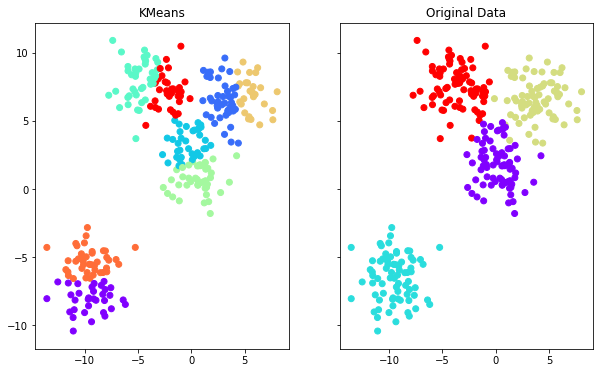

In [47]:
# we use matplotlib to do so :
fig , (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,6))
ax1.set_title('KMeans')
ax1.scatter(data[0][:,0], data[0][:,1],c=kmeans.labels_ , cmap='rainbow')

ax2.set_title('Original Data')
ax2.scatter(data[0][:,0], data[0][:,1],c=data[1], cmap='rainbow')

To destinguish the exact points which are in error we can increase the number of K clusters 